In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, learning_curve
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_auc_score

# 8th model run - labels v1, my choice features

In [49]:
labels = pd.read_csv('./../../labels/labels_v1/labels_v1.csv', index_col=0)
features = pd.read_csv('./../../data_preprocessing/genetic_data_preprocessing/cleaned_Genomic_features_all_repositories.csv', index_col=0)

print(list(features))

my_choice_features = features[['Telomeric_AI', 'LST_count', 'LOH_count']]
my_choice_features

['BRCA1/2_mut', 'other_HRR_gene_mutation_somatic', 'cnv_N_CNdipl', 'cnv_N_CNloss', 'cnv_N_CNgain', 'cnv_CNlt5_frac', 'cnv_CNgt10_frac', 'cnv_evenCN_frac', 'cnv_CNloss_frac', 'cnv_DUP_len_30000_inf', 'cnv_DUP_len_30_100', 'cnv_DEL_len_100000_inf', 'cnv_DIPLOID_len_100000_inf', 'sv_n_trans', 'sv_n_del', 'sv_n_inv', 'sv_n_tadem_dup', 'sv_trans_frac', 'sv_del_frac', 'sv_inv_frac', 'sv_tadem_dup_frac', 'sv_n_all_sv', 'sv_n_svclass_stdev', 'sv_dup_30000+', 'sv_del_100000+', 'sv_microhom_deletion_mean', 'sv_microhom_inversion_mean', 'sv_microhom_tandem-duplication_mean', 'sv_microhom_translocation_mean', 'indel_n_del', 'indel_n_ins', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_len_1', 'indel_DEL_len_2', 'indel_DEL_len_3', 'indel_DEL_len_4', 'indel_DEL_len_inf', 'indel_INS_len_1', 'indel_INS_len_2', 'indel_INS_len_3', 'indel_INS_len_4', 'indel_INS_len_inf', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'indel_del_mh_ratio', 'Telomeric_AI', 'Interstitial_AI', 'Telomeric_LOH', 'I

,Telomeric_AI,LST_count,LOH_count
SAMPLE_ID,,,
Sample_0002,16,0,5
Sample_0003,21,10,6
Sample_0004,34,39,20
Sample_0005,11,0,1
Sample_0006,13,3,4
...,...,...,...
Sample_0251,26,24,15
Sample_0252,23,6,8
Sample_0253,30,23,19


## Merge features and labels

In [50]:
table_v8 = pd.merge(my_choice_features, labels, on='SAMPLE_ID', how='inner')

table_v8 = table_v8.drop(columns=['Unnamed: 0'], errors='ignore')

table_v8 = table_v8.set_index('SAMPLE_ID', inplace=False)
table_v8.to_csv('merged_features_and_labelsv1_v8.csv')

## 8th model run - labels v1, my choice features

### Train/test split

In [51]:
columns_to_drop = ['labels_v1']

# features definition
X = table_v8.drop(columns_to_drop, axis=1)

# labels definition
y = table_v8['labels_v1'] # labels

original_indices = X.index

In [52]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, original_indices, test_size=0.3, random_state=42)

### Features normalization

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)

scores = cross_val_score(model, X, y, cv=5, scoring='precision')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean precision:", scores.mean())

Cross-validation scores: [0.63888889 0.67741935 0.64102564 0.64864865 0.61111111]
Mean precision: 0.6434187289025999


### Model testing

In [54]:
y_pred = model.predict(X_test)

y_pred_list = pd.DataFrame(y_pred, columns=['Predicted'], index=idx_test)
y_pred_list.to_csv('predicted_labelsv1_test_set_v8.csv')

### Model evaluation

In [55]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC: {roc_auc}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cr)

Accuracy: 0.559322033898305
AUC: 0.47797619047619044
Confusion Matrix:
[[ 1 23]
 [ 3 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.04      0.07        24
           1       0.58      0.91      0.71        35

    accuracy                           0.56        59
   macro avg       0.42      0.48      0.39        59
weighted avg       0.45      0.56      0.45        59



<Axes: >

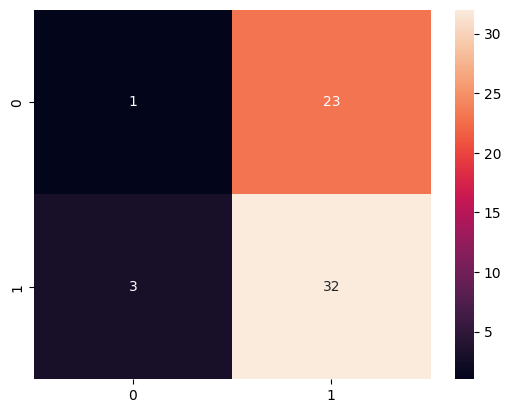

In [56]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [57]:
predicted_vs_original_labels = pd.merge(labels, y_pred_list, on='SAMPLE_ID', how='inner')
predicted_vs_original_labels.to_csv('predicted_vs_original_labelsv1_modelv8.csv')

## Repeat 8th model run - labels v2, my choice features

In [58]:
labels_r = pd.read_csv('./../../labels/labels_v2/labels_v2.csv', index_col=0)

table_v8_r = pd.merge(my_choice_features, labels_r, on='SAMPLE_ID', how='inner')

table_v8_r = table_v8_r.drop(columns=['Unnamed: 0'], errors='ignore')

table_v8_r = table_v8_r.set_index('SAMPLE_ID', inplace=False)
table_v8_r.to_csv('merged_features_and_labelsv2_v8.csv')

In [59]:
columns_to_drop = ['labels_v2']

# features definition
X = table_v8_r.drop(columns_to_drop, axis=1)

# labels definition
y = table_v8_r['labels_v2'] # labels

original_indices = X.index

In [60]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, original_indices, test_size=0.3, random_state=42)

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

scores = cross_val_score(model, X, y, cv=5, scoring='precision')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean precision:", scores.mean())

Cross-validation scores: [0.89473684 0.89473684 0.89473684 0.89473684 0.89473684]
Mean precision: 0.8947368421052632


In [62]:
y_pred = model.predict(X_test)

y_pred_list = pd.DataFrame(y_pred, columns=['Predicted'], index=idx_test)
y_pred_list.to_csv('predicted_labelsv2_test_set_v8.csv')

In [63]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC: {roc_auc}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cr)

Accuracy: 0.8620689655172413
AUC: 0.5
Confusion Matrix:
[[ 0  4]
 [ 0 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.86      1.00      0.93        25

    accuracy                           0.86        29
   macro avg       0.43      0.50      0.46        29
weighted avg       0.74      0.86      0.80        29



/home/klaudiautm/PycharmProjects/final_project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/klaudiautm/PycharmProjects/final_project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/klaudiautm/PycharmProjects/final_project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<Axes: >

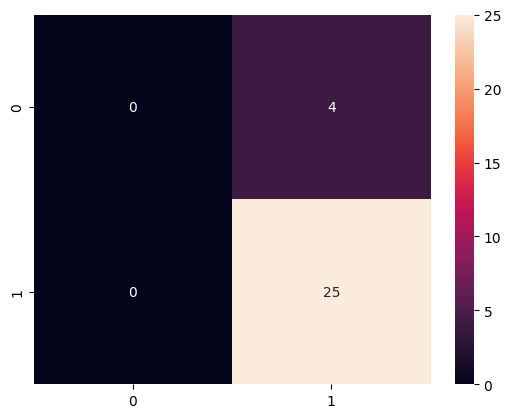

In [64]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [65]:
predicted_vs_original_labels = pd.merge(labels, y_pred_list, on='SAMPLE_ID', how='inner')
predicted_vs_original_labels.to_csv('predicted_vs_original_labelsv2_modelv8.csv')